# **Correlación cruzada con archivo de OpenFOAM**
---
## *Subcoordinación de Posgrado y Educación Continua.*
### [Instituto Mexicano de Tecnología del Agua](https://www.gob.mx/imta).<br>

<img src="./Datos/Imagenes/Logos.png" style="height: 7em; vertical-align: middle;">

**Alumno: Ing. Omar Ulises Robles Pereyra** <br>
**Tutor: Dr. Ariosto Aguilar Chávez** <br>

[![Open In Colab](Datos/Imagenes/colab-badge.svg)](https://colab.research.google.com/github/OmarURP/Toolbox_publica/blob/master/03_CorrelacionCruzada_OpenFOAM.ipynb)

In [11]:
import ImtaTURB as imta

In [12]:
# Cargar datos de velocidad desde archivo OpenFOAM
file = "Datos/OpenFOAM/20_cm/U_Articulo"
U_probes, tiempo, coords, frecuencia = imta.cargar_U_OpenFOAM(file)

Se extrajeron 21 probes.
Tiempo inicial: 0.00 s, tiempo final: 200.00 s
Duración de la muestra: 200.00 s
Frecuencia de muestreo: 100.00 Hz (Δt = 0.0100 s)


In [13]:
probe1 = 6
probe2 = 9
print(f"Coordenadas probe {probe1}: {coords[probe1]}")
print(f"Coordenadas probe {probe2}: {coords[probe2]}")
# Ventana de tiempo para análisis
inicio = 50
fin    = 200
# Tiempo de análisis
u1_file1, u2_file1, u3_file1, tiempo_file1, dfp_filt_file1 = imta.recortar_tiempo(U_probes, probe1,
                                                             inicio= inicio,
                                                             fin= fin)
u1_file2, u2_file2, u3_file2, tiempo_file2, dfp_filt_file2 = imta.recortar_tiempo(U_probes, probe2,
                                                             inicio= inicio,
                                                             fin= fin)

Coordenadas probe 6: (0.465, 0.1, 0.3)
Coordenadas probe 9: (0.535, 0.1, 0.3)


In [14]:
# Velocidades fluctuantes
# Archivo 1
# Velocidades fluctuantes para el archivo 1
u1_fluc_file1, fig = imta.fluctuante(u1_file1, tiempo=tiempo_file1, plot=False, titulo='Velocidad u1')
u2_fluc_file1, fig = imta.fluctuante(u2_file1, tiempo=tiempo_file1, plot=False, titulo='Velocidad u2')
u3_fluc_file1, fig = imta.fluctuante(u3_file1, tiempo=tiempo_file1, plot=False, titulo='Velocidad u3')
# Velocidades fluctuantes para el archivo 2
u1_fluc_file2, fig = imta.fluctuante(u1_file2, tiempo=tiempo_file2, plot=False, titulo='Velocidad u1')
u2_fluc_file2, fig = imta.fluctuante(u2_file2, tiempo=tiempo_file2, plot=False, titulo='Velocidad u2')
u3_fluc_file2, fig = imta.fluctuante(u3_file2, tiempo=tiempo_file2, plot=False, titulo='Velocidad u3')

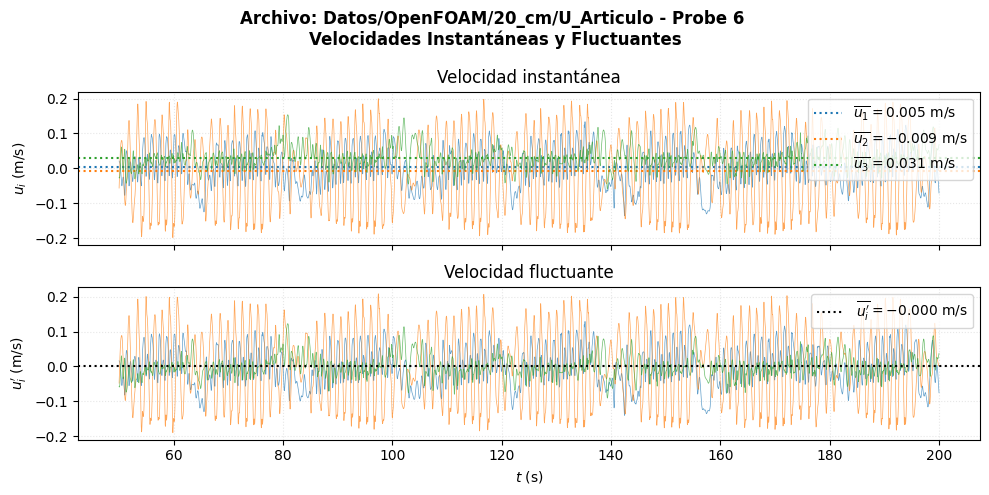

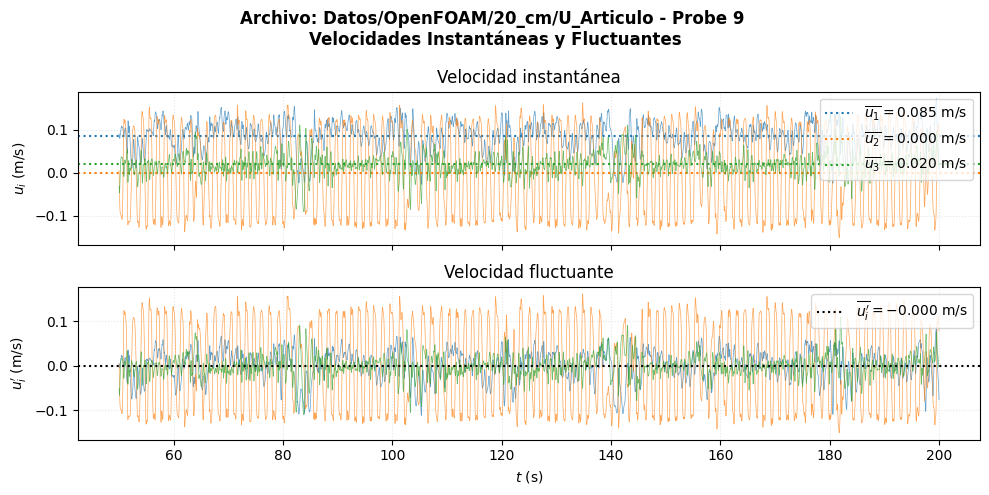

In [15]:
imta.plot_ui(tiempo_file1, u1_fluc_file1, u2_fluc_file1, u3_fluc_file1,
            titulo=f'Archivo: {file} - Probe {probe1} \nVelocidades Instantáneas y Fluctuantes',
            etiquetas=('u_1', 'u_2', 'u_3'));

imta.plot_ui(tiempo_file2, u1_fluc_file2, u2_fluc_file2, u3_fluc_file2,
            titulo=f'Archivo: {file} - Probe {probe2} \nVelocidades Instantáneas y Fluctuantes',
            etiquetas=('u_1', 'u_2', 'u_3'));

In [16]:
import matplotlib.pyplot as plt
# Imprimiendo el tensor de esfuerzos de Reynolds
u1u1 = u1_fluc_file1['fluc'] * u1_fluc_file2['fluc']
u1u2 = u1_fluc_file1['fluc'] * u2_fluc_file2['fluc']
u1u3 = u1_fluc_file1['fluc'] * u3_fluc_file2['fluc']
u2u1 = u2_fluc_file1['fluc'] * u1_fluc_file2['fluc']
u2u2 = u2_fluc_file1['fluc'] * u2_fluc_file2['fluc']
u2u3 = u2_fluc_file1['fluc'] * u3_fluc_file2['fluc']
u3u1 = u3_fluc_file1['fluc'] * u1_fluc_file2['fluc']
u3u2 = u3_fluc_file1['fluc'] * u2_fluc_file2['fluc']
u3u3 = u3_fluc_file1['fluc'] * u3_fluc_file2['fluc']

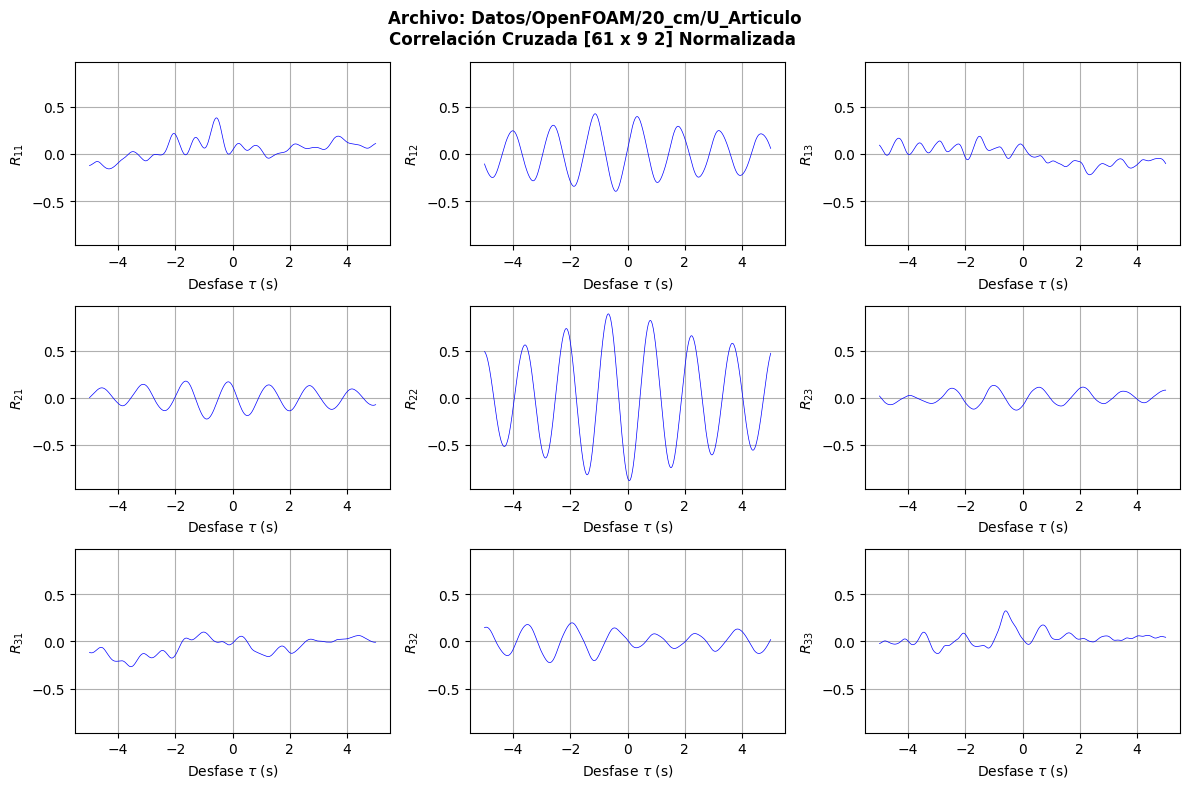

In [17]:
tensor_r, lags_s, fig = imta.correlacion_cruzada_norm(u1_fluc_file1['fluc'], u1_fluc_file2['fluc'],
                             u2_fluc_file1['fluc'], u2_fluc_file2['fluc'],
                             u3_fluc_file1['fluc'], u3_fluc_file2['fluc'],
                             frecuencia,
                             titulo=f'Archivo: {file}\nCorrelación Cruzada [{probe1}1 x {probe2} 2] Normalizada ',
                             max_lag_seg=5);

Valor máximo de correlación: 0.8890537619590759
Posición del valor máximo: -0.67


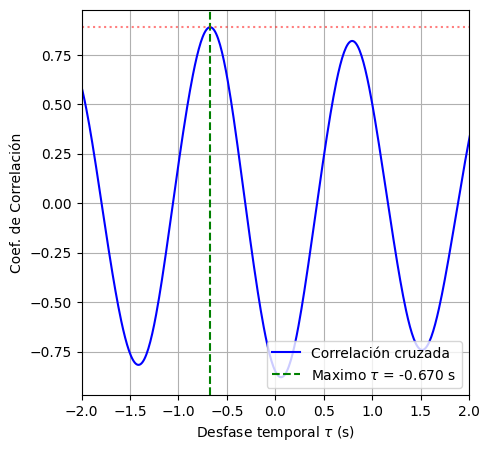

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#plt.plot(tensor_r['r22'])
R_p = tensor_r['r22']
max_corr_x = np.argmax((R_p))
tau_max = lags_s[max_corr_x]
max_corr_val = R_p[max_corr_x]
print(f"Valor máximo de correlación: {max_corr_val}")
print(f"Posición del valor máximo: {tau_max}")
# Visualización de resultados
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(lags_s, R_p, 'b-', label='Correlación cruzada')
ax.axvline(x=tau_max, color='g', linestyle='--', label=f'Maximo $\\tau$ = {tau_max:.3f} s')
ax.axhline(y=max_corr_val, color='r', linestyle=':', alpha=0.5)
ax.set_ylabel('Coef. de Correlación')
ax.set_xlabel('Desfase temporal $\\tau$ (s)')
ax.grid(True)
ax.legend(loc='lower right')
ax.set_xlim(-2, 2);
# Cambiar fondo a transparente de la figura y blanco en los ejes
fig.patch.set_facecolor('none')
ax.set_facecolor('white')

Componente r11: Frecuencia máxima = 0.053 Hz, Energía = 2.803e+05
Componente r12: Frecuencia máxima = 0.680 Hz, Energía = 2.579e+06
Componente r13: Frecuencia máxima = 0.050 Hz, Energía = 2.307e+05
Componente r21: Frecuencia máxima = 0.680 Hz, Energía = 7.524e+05
Componente r22: Frecuencia máxima = 0.680 Hz, Energía = 1.347e+07
Componente r23: Frecuencia máxima = 0.683 Hz, Energía = 2.719e+05
Componente r31: Frecuencia máxima = 0.053 Hz, Energía = 1.354e+05
Componente r32: Frecuencia máxima = 0.680 Hz, Energía = 7.123e+05
Componente r33: Frecuencia máxima = 0.050 Hz, Energía = 1.394e+05


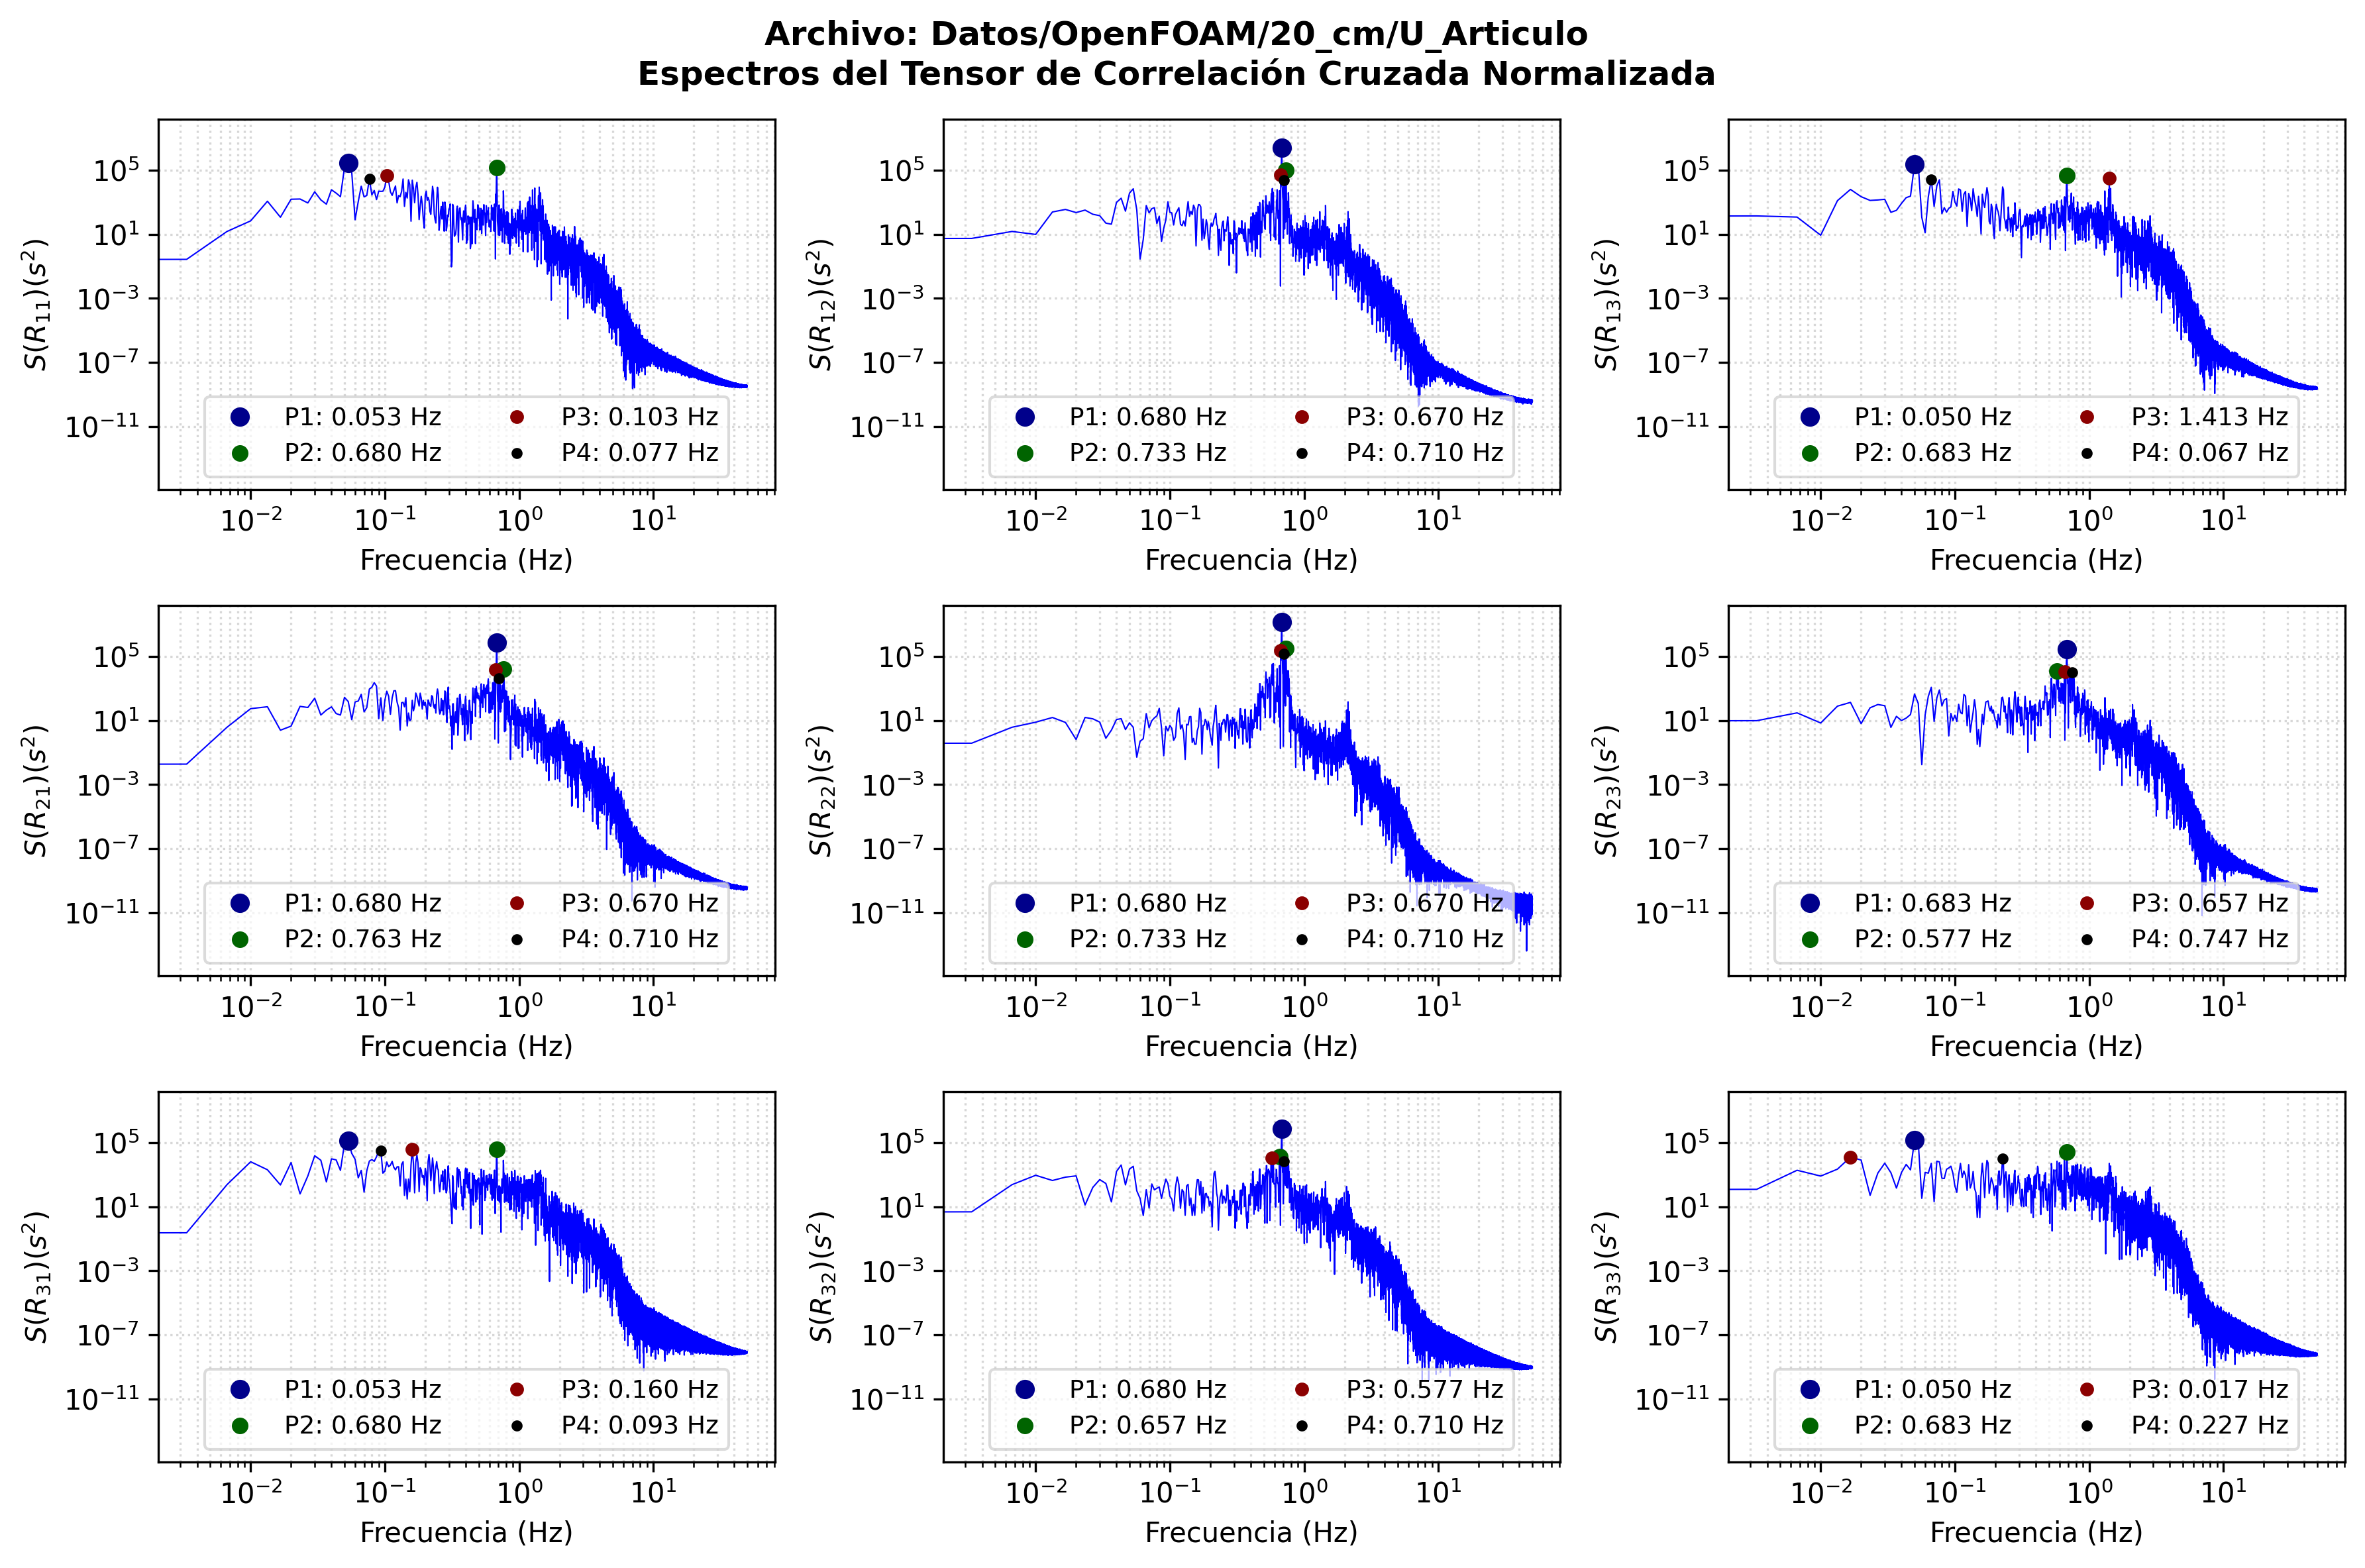

In [19]:
frecuencias, espectro, fig = imta.espectros_tensor(tensor_r,
                                                   frecuencia,
                                                   titulo=f'Archivo: {file} \nEspectros del Tensor de Correlación Cruzada Normalizada ',
                                                   plot=True,
                                                   dpi=300)